In [25]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [19]:
before_dir = "D:\\Projects\\ibs-ids-satellite-surveillance\\data\\raw\\before"
after_dir = "D:\\Projects\\ibs-ids-satellite-surveillance\\data\\raw\\after"

image_name = "00028.png"

before_path = os.path.join(before_dir, image_name)
after_path = os.path.join(after_dir, image_name)

In [20]:
before_img = cv2.imread(before_path)
after_img = cv2.imread(after_path)

before_img = cv2.cvtColor(before_img, cv2.COLOR_BGR2RGB)
after_img = cv2.cvtColor(after_img, cv2.COLOR_BGR2RGB)

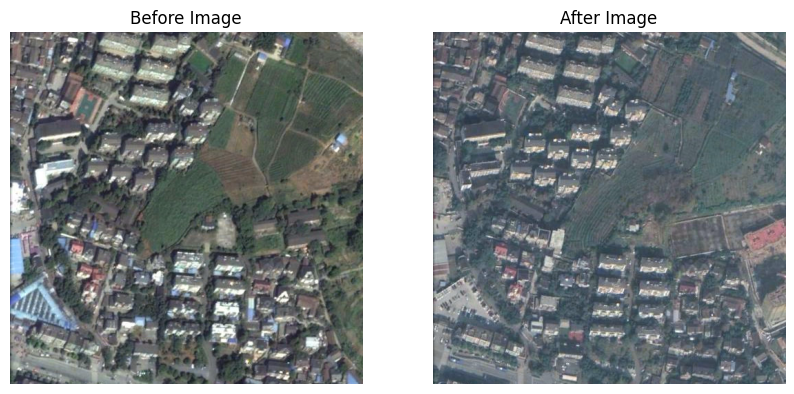

In [21]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(before_img)
plt.title("Before Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(after_img)
plt.title("After Image")
plt.axis("off")

plt.show()

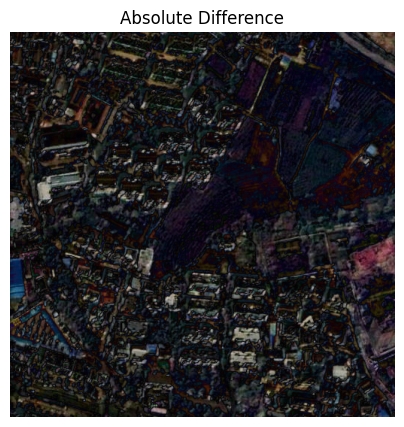

In [ ]:
diff = cv2.absdiff(before_img, after_img)

plt.figure(figsize=(5,5))
plt.imshow(diff)
plt.title("Absolute Difference")
plt.axis("off")
plt.show()

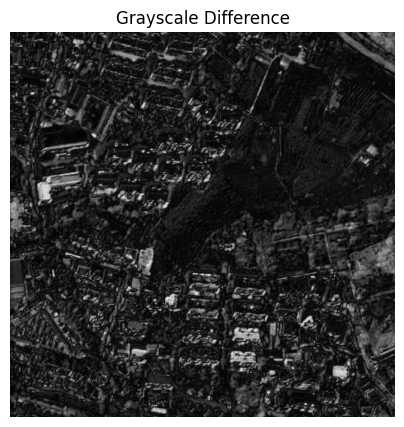

In [23]:
gray_diff = cv2.cvtColor(diff, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(5,5))
plt.imshow(gray_diff, cmap="gray")
plt.title("Grayscale Difference")
plt.axis("off")
plt.show()

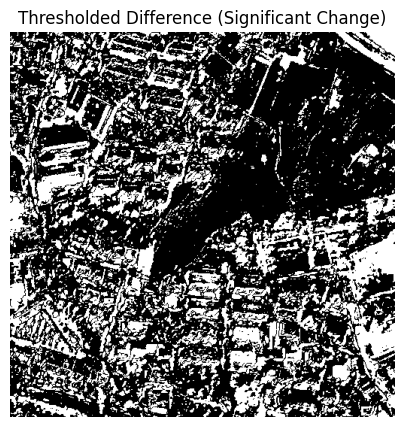

In [24]:
_, thresh = cv2.threshold(gray_diff, 30, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(5,5))
plt.imshow(thresh, cmap="gray")
plt.title("Thresholded Difference (Significant Change)")
plt.axis("off")
plt.show()

In [26]:
total_pixels = thresh.shape[0] * thresh.shape[1]
changed_pixels = np.sum(thresh == 255)

intrusion_score = (changed_pixels / total_pixels) * 100

intrusion_score

np.float64(32.86018371582031)

In [27]:
THRESHOLD_PERCENT = 1.0  # adjustable

if intrusion_score > THRESHOLD_PERCENT:
    print("Intrusion Detected")
else:
    print("No Significant Intrusion")

Intrusion Detected


### Intrusion Decision
A simple intrusion score is computed as the percentage of significantly changed pixels. 
If the score exceeds a predefined threshold, the image pair is classified as an intrusion event.
This provides a quantitative and interpretable intrusion detection mechanism.